딥러닝과 케라스를 공부하면서 느낀 점은 층을 쌓고 모델을 만들고 하는 과정들이 블록 쌓는 것과 비슷한 느낌을 많이 받았고, 실제로 딥러닝 모델을 설명할 때 블록 그림을 많이 이용하기도 했습니다. 그러다가 (실제 혹은 웹에서) 블록을 쌓으면 딥러닝 모델까지 자동으로 만들 수 있겠다는 생각이 들었습니다. 그래서 `딥브릭(DeepBrick)`이란 이름으로 프로젝트를 진행해볼까 합니다.

In [ ]:
# 회귀 문제 - 퍼셉트론

import numpy as np

X_train = np.array([160, 165, 170, 175, 180])
Y_train = np.array([60, 65, 70, 80, 82])

a = np.cov(X_train, Y_train, bias=1)[0,1] / np.var(X_train)
b = np.average(Y_train) - a * np.average(X_train)

print a, b

In [ ]:
# 회귀 문제 - 퍼셉트론

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

X_train = np.array([[160], [165], [170], [175], [180]])
Y_train = np.array([60, 65, 70, 80, 82])

model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(loss='mse', optimizer='rmsprop')
model.fit(X_train, Y_train, epochs=1000, batch_size=5)

a, b = model.get_weights()

print a, b

Epoch 1/200
1000/1000 [==============================] - 0s - loss: 1.3714     
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 1.3089     
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 1.2566     
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 1.2059     
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 1.1565     
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 1.1087     
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 1.0619     
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 1.0168     
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 0.9722     
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 0.9288     
Epoch 11/200
1000/1000 [==============================] - 0s - loss: 0.8867     
Epoch 12/200
1000/1000 [==============================] - 0s - loss: 0.8462     
Epoch 13/200
1000/1000 [=============

1000/1000 [==============================] - 0s - loss: 0.0185     
Epoch 103/200
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 104/200
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 105/200
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 106/200
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 107/200
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 108/200
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 109/200
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 110/200
1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 111/200
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 112/200
1000/1000 [==============================] - 0s - loss: 0.0086     
Epoch 113/200
1000/1000 [==============================] - 0s - loss: 0.0079     
Epoch 114/200
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 5.6392e-07     
Epoch 199/200
1000/1000 [==============================] - 0s - loss: 5.5124e-07     
Epoch 200/200
 32/100 [========>.....................] - ETA: 0sloss : 9.62956550211e-06


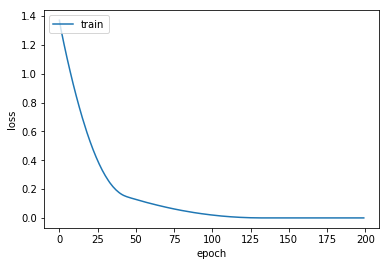

In [59]:
# 회귀 문제 - 퍼셉트론

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + (random.random() / 100.0)
x_test = np.random.random((100, 1))
y_test = x_test * 2 + (random.random() / 100.0)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop',
              loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [54]:
# 회귀 문제 - 다층퍼셉트론 (relu)

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + (random.random() / 100.0)
x_test = np.random.random((100, 1))
y_test = x_test * 2 + (random.random() / 100.0)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop',
              loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Epoch 1/200
1000/1000 [==============================] - 0s - loss: 1.2470     
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 0.7990     
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 0.5097     
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 0.3030     
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 0.1681     
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 0.0997     
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 0.0724     
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 0.0554     
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 0.0395     
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 0.0254     
Epoch 11/200
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 12/200
1000/1000 [==============================] - 0s - loss: 0.0068     
Epoch 13/200
1000/1000 [=============

1000/1000 [==============================] - 0s - loss: 5.8280e-05     
Epoch 99/200
1000/1000 [==============================] - 0s - loss: 4.9737e-05     
Epoch 100/200
1000/1000 [==============================] - 0s - loss: 4.9878e-05     
Epoch 101/200
1000/1000 [==============================] - 0s - loss: 5.1940e-05     
Epoch 102/200
1000/1000 [==============================] - 0s - loss: 5.5896e-05     
Epoch 103/200
1000/1000 [==============================] - 0s - loss: 5.4650e-05     
Epoch 104/200
1000/1000 [==============================] - 0s - loss: 5.0716e-05     
Epoch 105/200
1000/1000 [==============================] - 0s - loss: 5.4791e-05     
Epoch 106/200
1000/1000 [==============================] - 0s - loss: 5.1559e-05     
Epoch 107/200
1000/1000 [==============================] - 0s - loss: 5.4783e-05     
Epoch 108/200
1000/1000 [==============================] - 0s - loss: 5.3433e-05     
Epoch 109/200
1000/1000 [==============================] - 0s - loss:

1000/1000 [==============================] - 0s - loss: 5.8653e-05     
Epoch 194/200
1000/1000 [==============================] - 0s - loss: 5.0477e-05     
Epoch 195/200
1000/1000 [==============================] - 0s - loss: 5.7371e-05     
Epoch 196/200
1000/1000 [==============================] - 0s - loss: 5.2249e-05     
Epoch 197/200
1000/1000 [==============================] - 0s - loss: 4.7395e-05     
Epoch 198/200
1000/1000 [==============================] - 0s - loss: 5.5051e-05     
Epoch 199/200
1000/1000 [==============================] - 0s - loss: 5.8779e-05     
Epoch 200/200
 32/100 [========>.....................] - ETA: 0sloss : 4.54000689206e-05
[0] x: 0.669074, y_true: 1.347058, y_predict: 1.339777
[1] x: 0.176758, y_true: 0.362426, y_predict: 0.356544
[2] x: 0.577690, y_true: 1.164291, y_predict: 1.157269
[3] x: 0.598130, y_true: 1.205171, y_predict: 1.198092
[4] x: 0.412379, y_true: 0.833669, y_predict: 0.827117
[5] x: 0.625266, y_true: 1.259442, y_predict: 1.

Epoch 1/200
1000/1000 [==============================] - 0s - loss: 0.5897     
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 0.0984     
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 0.0018     
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 6.0712e-04     
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 5.1983e-04     
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 5.6215e-04     
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 7.0106e-04     
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 5.2783e-04     
Epoch 11/200
1000/1000 [==============================] - 0s - loss: 4.6976e-04     
Epoch 12/200
1000/1000 [==============================] - 0s - loss: 5.2014e-04     
Epoch 13/

1000/1000 [==============================] - 0s - loss: 3.8178e-04     
Epoch 98/200
1000/1000 [==============================] - 0s - loss: 3.7529e-04     
Epoch 99/200
1000/1000 [==============================] - 0s - loss: 4.0724e-04     
Epoch 100/200
1000/1000 [==============================] - 0s - loss: 3.8936e-04     
Epoch 101/200
1000/1000 [==============================] - 0s - loss: 3.7120e-04     
Epoch 102/200
1000/1000 [==============================] - 0s - loss: 4.3597e-04     
Epoch 103/200
1000/1000 [==============================] - 0s - loss: 3.4475e-04     
Epoch 104/200
1000/1000 [==============================] - 0s - loss: 4.0383e-04     
Epoch 105/200
1000/1000 [==============================] - 0s - loss: 3.9479e-04     
Epoch 106/200
1000/1000 [==============================] - 0s - loss: 3.4136e-04     
Epoch 107/200
1000/1000 [==============================] - 0s - loss: 3.4173e-04     
Epoch 108/200
1000/1000 [==============================] - 0s - loss: 

1000/1000 [==============================] - 0s - loss: 2.2782e-04     
Epoch 193/200
1000/1000 [==============================] - 0s - loss: 3.1439e-04     
Epoch 194/200
1000/1000 [==============================] - 0s - loss: 3.0485e-04     
Epoch 195/200
1000/1000 [==============================] - 0s - loss: 3.3057e-04     
Epoch 196/200
1000/1000 [==============================] - 0s - loss: 3.0571e-04     
Epoch 197/200
1000/1000 [==============================] - 0s - loss: 3.2569e-04     
Epoch 198/200
1000/1000 [==============================] - 0s - loss: 2.9517e-04     
Epoch 199/200
1000/1000 [==============================] - 0s - loss: 3.2750e-04     
Epoch 200/200
 32/100 [========>.....................] - ETA: 0sloss : 0.000390437124297


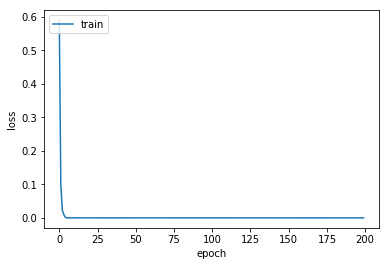

In [62]:
# 회귀 문제 - 다층퍼셉트론 (relu)

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + (random.random() / 100.0)
x_test = np.random.random((100, 1))
y_test = x_test * 2 + (random.random() / 100.0)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop',
              loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

x: 0.252258, y_true: 0.513912, y_predict: 0.511924


Epoch 1/200
1000/1000 [==============================] - 0s - loss: 0.7010 - acc: 0.5000     
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 0.6954 - acc: 0.5050     
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 0.6946 - acc: 0.5190     
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 0.6929 - acc: 0.5140     
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 0.6917 - acc: 0.5350     
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 0.6908 - acc: 0.5290     
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 0.6899 - acc: 0.5270     
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 0.6887 - acc: 0.5440     
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 0.6882 - acc: 0.5380     
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 0.6881 - acc: 0.5430     
Epoch 11/200
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s - loss: 0.6600 - acc: 0.6220     
Epoch 88/200
1000/1000 [==============================] - 0s - loss: 0.6585 - acc: 0.6240     
Epoch 89/200
1000/1000 [==============================] - 0s - loss: 0.6590 - acc: 0.6280     
Epoch 90/200
1000/1000 [==============================] - 0s - loss: 0.6584 - acc: 0.6270     
Epoch 91/200
1000/1000 [==============================] - 0s - loss: 0.6582 - acc: 0.6220     
Epoch 92/200
1000/1000 [==============================] - 0s - loss: 0.6572 - acc: 0.6220     
Epoch 93/200
1000/1000 [==============================] - 0s - loss: 0.6572 - acc: 0.6170     
Epoch 94/200
1000/1000 [==============================] - 0s - loss: 0.6561 - acc: 0.6340     
Epoch 95/200
1000/1000 [==============================] - 0s - loss: 0.6564 - acc: 0.6230     
Epoch 96/200
1000/1000 [==============================] - 0s - loss: 0.6559 - acc: 0.6310     
Epoch 97/200
1000/1000 [==============================] - 0s - 

1000/1000 [==============================] - 0s - loss: 0.6238 - acc: 0.6660     
Epoch 173/200
1000/1000 [==============================] - 0s - loss: 0.6236 - acc: 0.6640     
Epoch 174/200
1000/1000 [==============================] - 0s - loss: 0.6244 - acc: 0.6600     
Epoch 175/200
1000/1000 [==============================] - 0s - loss: 0.6233 - acc: 0.6660     
Epoch 176/200
1000/1000 [==============================] - 0s - loss: 0.6231 - acc: 0.6670     
Epoch 177/200
1000/1000 [==============================] - 0s - loss: 0.6229 - acc: 0.6680     
Epoch 178/200
1000/1000 [==============================] - 0s - loss: 0.6219 - acc: 0.6660     
Epoch 179/200
1000/1000 [==============================] - 0s - loss: 0.6203 - acc: 0.6660     
Epoch 180/200
1000/1000 [==============================] - 0s - loss: 0.6220 - acc: 0.6680     
Epoch 181/200
1000/1000 [==============================] - 0s - loss: 0.6217 - acc: 0.6640     
Epoch 182/200
1000/1000 [=============================

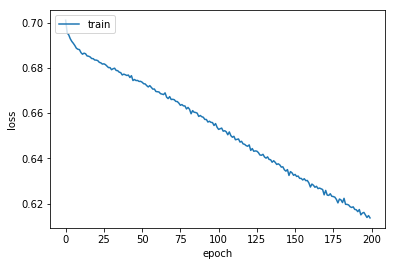

In [63]:
# 이진 분류 문제

import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [11]:
# 다중클래스 분류 문제

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(10, size=(1000, 1))
y_train = to_categorical(y_train, num_classes=10) # one-hot 인코딩
x_test = np.random.random((100, 12))
y_test = np.random.randint(10, size=(100, 1))
y_test = to_categorical(y_test, num_classes=10) # one-hot 인코딩

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/500
1000/1000 [==============================] - 0s - loss: 2.3568 - acc: 0.1170      
Epoch 2/500
1000/1000 [==============================] - 0s - loss: 2.3122 - acc: 0.1140     
Epoch 3/500
1000/1000 [==============================] - 0s - loss: 2.3012 - acc: 0.1350     
Epoch 4/500
1000/1000 [==============================] - 0s - loss: 2.2894 - acc: 0.1320     
Epoch 5/500
1000/1000 [==============================] - 0s - loss: 2.2823 - acc: 0.1370     
Epoch 6/500
1000/1000 [==============================] - 0s - loss: 2.2724 - acc: 0.1440     
Epoch 7/500
1000/1000 [==============================] - 0s - loss: 2.2640 - acc: 0.1520     
Epoch 8/500
1000/1000 [==============================] - 0s - loss: 2.2581 - acc: 0.1480     
Epoch 9/500
1000/1000 [==============================] - 0s - loss: 2.2497 - acc: 0.1570     
Epoch 10/500
1000/1000 [==============================] - 0s - loss: 2.2413 - acc: 0.1680     
Epoch 11/500
1000/1000 [==============================] - 

1000/1000 [==============================] - 0s - loss: 1.6603 - acc: 0.4570     
Epoch 88/500
1000/1000 [==============================] - 0s - loss: 1.6533 - acc: 0.4600     
Epoch 89/500
1000/1000 [==============================] - 0s - loss: 1.6419 - acc: 0.4640     
Epoch 90/500
1000/1000 [==============================] - 0s - loss: 1.6409 - acc: 0.4640     
Epoch 91/500
1000/1000 [==============================] - 0s - loss: 1.6319 - acc: 0.4710     
Epoch 92/500
1000/1000 [==============================] - 0s - loss: 1.6277 - acc: 0.4760     
Epoch 93/500
1000/1000 [==============================] - 0s - loss: 1.6185 - acc: 0.4870     
Epoch 94/500
1000/1000 [==============================] - 0s - loss: 1.6138 - acc: 0.4750     
Epoch 95/500
1000/1000 [==============================] - 0s - loss: 1.6080 - acc: 0.4760     
Epoch 96/500
1000/1000 [==============================] - 0s - loss: 1.6016 - acc: 0.4910     
Epoch 97/500
1000/1000 [==============================] - 0s - 

1000/1000 [==============================] - 0s - loss: 1.1729 - acc: 0.6490     
Epoch 173/500
1000/1000 [==============================] - 0s - loss: 1.1729 - acc: 0.6370     
Epoch 174/500
1000/1000 [==============================] - 0s - loss: 1.1664 - acc: 0.6470     
Epoch 175/500
1000/1000 [==============================] - 0s - loss: 1.1602 - acc: 0.6500     
Epoch 176/500
1000/1000 [==============================] - 0s - loss: 1.1560 - acc: 0.6550     
Epoch 177/500
1000/1000 [==============================] - 0s - loss: 1.1432 - acc: 0.6600     
Epoch 178/500
1000/1000 [==============================] - 0s - loss: 1.1433 - acc: 0.6630     
Epoch 179/500
1000/1000 [==============================] - 0s - loss: 1.1390 - acc: 0.6640     
Epoch 180/500
1000/1000 [==============================] - 0s - loss: 1.1367 - acc: 0.6470     
Epoch 181/500
1000/1000 [==============================] - 0s - loss: 1.1312 - acc: 0.6580     
Epoch 182/500
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 0.7949 - acc: 0.8080     
Epoch 258/500
1000/1000 [==============================] - 0s - loss: 0.7925 - acc: 0.8080     
Epoch 259/500
1000/1000 [==============================] - 0s - loss: 0.7919 - acc: 0.8160     
Epoch 260/500
1000/1000 [==============================] - 0s - loss: 0.7818 - acc: 0.8080     
Epoch 261/500
1000/1000 [==============================] - 0s - loss: 0.7846 - acc: 0.8100     
Epoch 262/500
1000/1000 [==============================] - 0s - loss: 0.7806 - acc: 0.8230     
Epoch 263/500
1000/1000 [==============================] - 0s - loss: 0.7740 - acc: 0.8180     
Epoch 264/500
1000/1000 [==============================] - 0s - loss: 0.7670 - acc: 0.8250     
Epoch 265/500
1000/1000 [==============================] - 0s - loss: 0.7663 - acc: 0.8230     
Epoch 266/500
1000/1000 [==============================] - 0s - loss: 0.7667 - acc: 0.8180     
Epoch 267/500
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 0.5057 - acc: 0.9160     
Epoch 343/500
1000/1000 [==============================] - 0s - loss: 0.5023 - acc: 0.9200     
Epoch 344/500
1000/1000 [==============================] - 0s - loss: 0.4982 - acc: 0.9180     
Epoch 345/500
1000/1000 [==============================] - 0s - loss: 0.4970 - acc: 0.9250     
Epoch 346/500
1000/1000 [==============================] - 0s - loss: 0.4940 - acc: 0.9240     
Epoch 347/500
1000/1000 [==============================] - 0s - loss: 0.4914 - acc: 0.9290     
Epoch 348/500
1000/1000 [==============================] - 0s - loss: 0.4919 - acc: 0.9290     
Epoch 349/500
1000/1000 [==============================] - 0s - loss: 0.4906 - acc: 0.9180     
Epoch 350/500
1000/1000 [==============================] - 0s - loss: 0.4851 - acc: 0.9180     
Epoch 351/500
1000/1000 [==============================] - 0s - loss: 0.4806 - acc: 0.9320     
Epoch 352/500
1000/1000 [=============================

1000/1000 [==============================] - 0s - loss: 0.3006 - acc: 0.9780     
Epoch 428/500
1000/1000 [==============================] - 0s - loss: 0.2952 - acc: 0.9800     
Epoch 429/500
1000/1000 [==============================] - 0s - loss: 0.2988 - acc: 0.9770     
Epoch 430/500
1000/1000 [==============================] - 0s - loss: 0.2928 - acc: 0.9810     
Epoch 431/500
1000/1000 [==============================] - 0s - loss: 0.2950 - acc: 0.9780     
Epoch 432/500
1000/1000 [==============================] - 0s - loss: 0.2903 - acc: 0.9840     
Epoch 433/500
1000/1000 [==============================] - 0s - loss: 0.2845 - acc: 0.9820     
Epoch 434/500
1000/1000 [==============================] - 0s - loss: 0.2906 - acc: 0.9780     
Epoch 435/500
1000/1000 [==============================] - 0s - loss: 0.2848 - acc: 0.9830     
Epoch 436/500
1000/1000 [==============================] - 0s - loss: 0.2832 - acc: 0.9810     
Epoch 437/500
1000/1000 [=============================

In [13]:
# MLP 이진 분류 문제

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/200
1000/1000 [==============================] - 0s - loss: 0.7113 - acc: 0.4900     
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 0.7029 - acc: 0.4990     
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 0.7082 - acc: 0.4850     
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 0.7086 - acc: 0.4900     
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 0.6988 - acc: 0.5010     
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 0.6953 - acc: 0.5220     
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 0.6950 - acc: 0.5080     
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 0.6911 - acc: 0.5110     
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 0.6956 - acc: 0.5120     
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 0.6913 - acc: 0.5480     
Epoch 11/200
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s - loss: 0.6767 - acc: 0.5790     
Epoch 87/200
1000/1000 [==============================] - 0s - loss: 0.6776 - acc: 0.5640     
Epoch 88/200
1000/1000 [==============================] - 0s - loss: 0.6782 - acc: 0.5660     
Epoch 89/200
1000/1000 [==============================] - 0s - loss: 0.6700 - acc: 0.6050     
Epoch 90/200
1000/1000 [==============================] - 0s - loss: 0.6749 - acc: 0.5690     
Epoch 91/200
1000/1000 [==============================] - 0s - loss: 0.6677 - acc: 0.5860     
Epoch 92/200
1000/1000 [==============================] - 0s - loss: 0.6692 - acc: 0.5840     
Epoch 93/200
1000/1000 [==============================] - 0s - loss: 0.6703 - acc: 0.5740     
Epoch 94/200
1000/1000 [==============================] - 0s - loss: 0.6686 - acc: 0.5780     
Epoch 95/200
1000/1000 [==============================] - 0s - loss: 0.6633 - acc: 0.5880     
Epoch 96/200
1000/1000 [==============================] - 0s - 

1000/1000 [==============================] - 0s - loss: 0.6421 - acc: 0.6250     
Epoch 172/200
1000/1000 [==============================] - 0s - loss: 0.6398 - acc: 0.6110     
Epoch 173/200
1000/1000 [==============================] - 0s - loss: 0.6450 - acc: 0.6200     
Epoch 174/200
1000/1000 [==============================] - 0s - loss: 0.6336 - acc: 0.6220     
Epoch 175/200
1000/1000 [==============================] - 0s - loss: 0.6515 - acc: 0.6050     
Epoch 176/200
1000/1000 [==============================] - 0s - loss: 0.6424 - acc: 0.6180     
Epoch 177/200
1000/1000 [==============================] - 0s - loss: 0.6418 - acc: 0.6260     
Epoch 178/200
1000/1000 [==============================] - 0s - loss: 0.6583 - acc: 0.5930     
Epoch 179/200
1000/1000 [==============================] - 0s - loss: 0.6297 - acc: 0.6300     
Epoch 180/200
1000/1000 [==============================] - 0s - loss: 0.6456 - acc: 0.6050     
Epoch 181/200
1000/1000 [=============================

In [15]:
# MLP 다중클래스 분류 문제

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(10, size=(1000, 1))
y_train = to_categorical(y_train, num_classes=10) # one-hot 인코딩
x_test = np.random.random((100, 12))
y_test = np.random.randint(10, size=(100, 1))
y_test = to_categorical(y_test, num_classes=10) # one-hot 인코딩

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=200, batch_size=64)

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/200
1000/1000 [==============================] - 0s - loss: 2.3813 - acc: 0.1000     
Epoch 2/200
1000/1000 [==============================] - 0s - loss: 2.3248 - acc: 0.1120     
Epoch 3/200
1000/1000 [==============================] - 0s - loss: 2.3233 - acc: 0.0990     
Epoch 4/200
1000/1000 [==============================] - 0s - loss: 2.3149 - acc: 0.1020     
Epoch 5/200
1000/1000 [==============================] - 0s - loss: 2.3205 - acc: 0.1030     
Epoch 6/200
1000/1000 [==============================] - 0s - loss: 2.3031 - acc: 0.1020     
Epoch 7/200
1000/1000 [==============================] - 0s - loss: 2.3065 - acc: 0.0970     
Epoch 8/200
1000/1000 [==============================] - 0s - loss: 2.3061 - acc: 0.0950     
Epoch 9/200
1000/1000 [==============================] - 0s - loss: 2.3023 - acc: 0.1020     
Epoch 10/200
1000/1000 [==============================] - 0s - loss: 2.3083 - acc: 0.0920     
Epoch 11/200
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s - loss: 2.2825 - acc: 0.1400     
Epoch 88/200
1000/1000 [==============================] - 0s - loss: 2.2751 - acc: 0.1400     
Epoch 89/200
1000/1000 [==============================] - 0s - loss: 2.2833 - acc: 0.1320     
Epoch 90/200
1000/1000 [==============================] - 0s - loss: 2.2848 - acc: 0.1420     
Epoch 91/200
1000/1000 [==============================] - 0s - loss: 2.2833 - acc: 0.1420     
Epoch 92/200
1000/1000 [==============================] - 0s - loss: 2.2820 - acc: 0.1350     
Epoch 93/200
1000/1000 [==============================] - 0s - loss: 2.2809 - acc: 0.1350     
Epoch 94/200
1000/1000 [==============================] - 0s - loss: 2.2834 - acc: 0.1390     
Epoch 95/200
1000/1000 [==============================] - 0s - loss: 2.2764 - acc: 0.1410     
Epoch 96/200
1000/1000 [==============================] - 0s - loss: 2.2843 - acc: 0.1240     
Epoch 97/200
1000/1000 [==============================] - 0s - 

1000/1000 [==============================] - 0s - loss: 2.2443 - acc: 0.1610     
Epoch 172/200
1000/1000 [==============================] - 0s - loss: 2.2553 - acc: 0.1510     
Epoch 173/200
1000/1000 [==============================] - 0s - loss: 2.2593 - acc: 0.1510     
Epoch 174/200
1000/1000 [==============================] - 0s - loss: 2.2501 - acc: 0.1620     
Epoch 175/200
1000/1000 [==============================] - ETA: 0s - loss: 2.2852 - acc: 0.093 - 0s - loss: 2.2581 - acc: 0.1560     
Epoch 176/200
1000/1000 [==============================] - 0s - loss: 2.2520 - acc: 0.1640     
Epoch 177/200
1000/1000 [==============================] - 0s - loss: 2.2603 - acc: 0.1380     
Epoch 178/200
1000/1000 [==============================] - 0s - loss: 2.2601 - acc: 0.1590     
Epoch 179/200
1000/1000 [==============================] - 0s - loss: 2.2514 - acc: 0.1610     
Epoch 180/200
1000/1000 [==============================] - 0s - loss: 2.2521 - acc: 0.1600     
Epoch 181/200
10

---

### 결론

저는 상상이되는 글, 그림, 코드, 생각 등을 좋아합니다. 이 이야기는 상당히 상상력이 자극되는 것 같습니다. 얼마나 다양한 유닛이 만들어질지, 얼마나 멋진 모델을 조립할 수 있을 지 궁금하네요. 이런 상상도 해봅니다. 어린이들이 딥러닝 블록을 조립한 뒤 학습을 시키면, 그 학습 결과가 가중치 블록에 저장됩니다. 그 가중치 블록을 로봇 등이 꼽기만 하면 동작이 될 수 있겠죠? 망상에 가까울려나요? 여러 사람들의 의견으로 좀 더 직관적이고 재미있는 아이디어가 많이 담긴 `딥브릭(DeepBrick) 이야기`가 되었으면 합니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-9-DeepBrick_Talk_4.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)